In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')

In [ ]:
df = df[((df['Profit'] > -20000) & (df['Profit'] < 110000))]
df.replace(["FEMALE", "Female"], "female", inplace=True)

In [ ]:
df

,Payments,Costs,Profit,Age,Gender,AgeGroup
0,9400,8100,1300,19,male,18-24
1,26600,13900,12700,29,male,25-39
2,9750,6750,3000,20,male,18-24
3,29700,11200,18500,18,female,18-24
4,49700,10450,39250,21,female,18-24
...,...,...,...,...,...,...
8710,8650,8600,50,18,male,18-24
8711,45350,14350,31000,19,female,18-24
8712,41700,9900,31800,18,female,18-24
8713,120600,49650,70950,21,male,18-24


In [ ]:
result = pd.DataFrame({
    'Количество клиентов': [df['Profit'].count()],
    'Средняя прибыль': [df['Profit'].mean()]
})
result

,Количество клиентов,Средняя прибыль
0,8713,15755.095834


In [ ]:
df1 = df[df['AgeGroup'] == '18-24']
df1.groupby('Gender').agg({'Profit' : 'mean'})

,Profit
Gender,
female,26278.373894
male,13155.762435


In [ ]:
male_df = df[(df['Gender'] == 'male') & (df['AgeGroup'] == '18-24')]
female_df = df[(df['Gender'] == 'female') & (df['AgeGroup'] == '18-24')]

In [ ]:
result = pd.DataFrame({
    'male' : [male_df['Profit'].mean()],
    'female' : [female_df['Profit'].mean()]
})

result.style.format(precision=2).set_caption('Средняя прибыль с клиента по полам, до 24 лет')

,male,female
0,13155.76,26278.37


In [ ]:
pivot = df.pivot_table(values="Profit", index="Gender", columns="AgeGroup", aggfunc="mean")
pivot


AgeGroup,18-24,25-39,40+
Gender,,,
female,26278.373894,7879.496700,-343.750000
male,13155.762435,7927.821394,184.210526


In [ ]:
pivot.columns

Index(['18-24', '25-39', '40+'], dtype='object', name='AgeGroup')

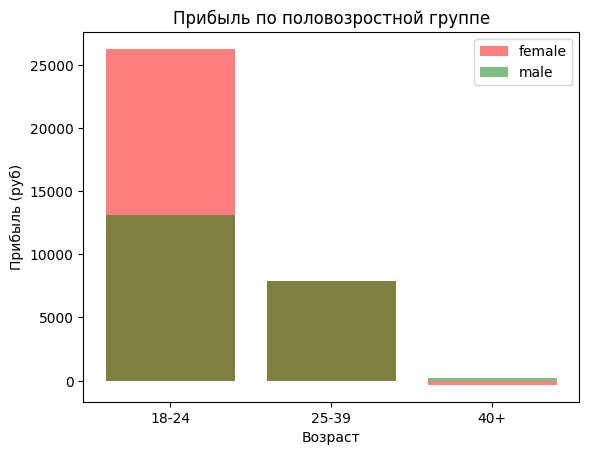

In [ ]:
plt.title("Прибыль по половозростной группе")
plt.ylabel('Прибыль (руб)')
plt.xlabel('Возраст')
plt.bar(x=pivot.columns, height=pivot.values[0], color='red', alpha=0.5, label='female')
plt.bar(x=pivot.columns, height=pivot.values[1], color='green', alpha=0.5, label='male')
plt.legend()

In [ ]:
pivot = df.pivot_table(values="Profit", index="Gender", columns="Age", aggfunc='mean')
pivot.style.set_caption("Средняя прибыль по полу и возрасту")

pivot

Age,18,19,20,21,22,23,24,25,26,27,...,39,40,41,42,43,44,45,46,48,49
Gender,,,,,,,,,,,,,,,,,,,,,
female,24962.386831,25286.645161,25537.500000,29843.442623,29493.5,32582.727273,29268.636364,8164.8,8562.755102,8016.814159,...,7905.555556,-642.5,-386.111111,-283.333333,-250.0,-16.666667,-7.142857,333.333333,-1200.0,-266.666667
male,2096.666667,2040.102564,1919.848485,78856.543624,80067.0,80548.235294,78583.695652,7534.0,7684.183673,7850.961538,...,9033.333333,-230.0,2175.000000,-250.000000,75.0,NaN,-650.000000,NaN,NaN,-2150.000000


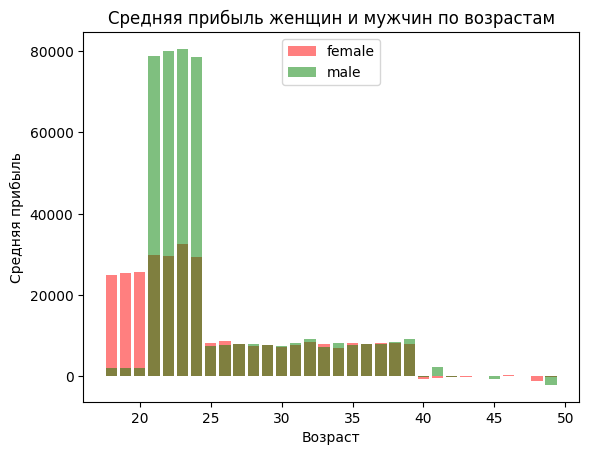

In [ ]:
plt.bar(x=pivot.columns, height=pivot.values[0], color='red', alpha=0.5, label='female')
plt.bar(x=pivot.columns, height=pivot.values[1], color='green', alpha=0.5, label='male')
plt.xlabel("Возраст")
plt.ylabel("Средняя прибыль")
plt.title("Средняя прибыль женщин и мужчин по возрастам")
plt.legend()